<a href="https://colab.research.google.com/github/idanjfhgkwl/myblog/blob/master/source/_posts/pandas_10minutes/pandas_10minutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 10분 완성

[데잇걸즈2](https://dataitgirls2.github.io/10minutes2pandas/)  
[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)  
[Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)  
[Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) 객체 생성 (Object Creation)

[데이터 구조 소개 섹션 (Intro to data structures)](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html)

**pandas.Series()**  
값을 가지고 있는 리스트를 통해 [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러온다.

In [35]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**pandas.date_range()**  
DatetimeIndex 데이터프레임을 만든다.

In [36]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

**pandas.DataFrame()**  
레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만든다.

In [37]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.682032,-1.905166,-0.545421,0.238074
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836
2013-01-04,0.509850,0.801045,0.015410,-0.671559
2013-01-05,1.403769,1.191673,-1.332947,0.663252
2013-01-06,0.825406,1.283820,0.421918,-0.115307


Series와 같은 것으로 변환될 수 있는 객체들의 딕셔너리로 구성된 데이터프레임을 만든다.

In [27]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


**.dtypes**  
데이터프레임 결과물의 열은 다양한 데이터 타입으로 구성된다.

In [38]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2) 데이터 확인하기 (Viewing Data)

[Basic Section (Essential basic functionality)](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#essential-basic-functionality)

**.head(), .tail()**  
괄호() 안에 숫자가 들어간다면 처음/마지막 줄의 특정 줄을 불러올 수 있다. 숫자가 들어가지 않으면 기본값인 5줄로 처리된다.

In [39]:
df.head() # 시작에서 처음 5줄 불러온다.

,A,B,C,D
2013-01-01,0.682032,-1.905166,-0.545421,0.238074
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836
2013-01-04,0.509850,0.801045,0.015410,-0.671559
2013-01-05,1.403769,1.191673,-1.332947,0.663252


In [40]:
df.tail(3) # 끝에서 마지막 3줄을 불러온다.

,A,B,C,D
2013-01-04,0.509850,0.801045,0.015410,-0.671559
2013-01-05,1.403769,1.191673,-1.332947,0.663252
2013-01-06,0.825406,1.283820,0.421918,-0.115307


**.index, .columns, .values**  
인덱스, 열 그리고 numpy 데이터에 대한 세부 정보를 본다.

In [41]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [42]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [43]:
df.values

array([[ 0.68203244, -1.90516572, -0.54542119,  0.23807417],
       [ 0.12077523, -0.57233779, -2.02072777, -0.5424847 ],
       [-0.57519992, -0.44213025, -0.15472648, -1.43383629],
       [ 0.5098502 ,  0.8010451 ,  0.01541041, -0.67155854],
       [ 1.40376854,  1.1916732 , -1.33294702,  0.66325193],
       [ 0.82540573,  1.28382005,  0.42191767, -0.11530747]])

**.describe()**  
[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)는 데이터의 대략적인 통계적 정보 요약을 보여준다.

In [44]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.494439,0.059484,-0.602749,-0.310310
std,0.671655,1.252312,0.914322,0.739363
min,-0.575200,-1.905166,-2.020728,-1.433836
25%,0.218044,-0.539786,-1.136066,-0.639290
50%,0.595941,0.179457,-0.350074,-0.328896
75%,0.789562,1.094016,-0.027124,0.149729
max,1.403769,1.283820,0.421918,0.663252


**.T**  
데이터를 전치한다.  
전치 행렬은 행과 열을 교환하여 얻는 행렬이다. 주대각선을 축으로 하는 반사 대칭을 가하여 얻는 행렬이다.

In [45]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.682032,0.120775,-0.575200,0.509850,1.403769,0.825406
B,-1.905166,-0.572338,-0.442130,0.801045,1.191673,1.283820
C,-0.545421,-2.020728,-0.154726,0.015410,-1.332947,0.421918
D,0.238074,-0.542485,-1.433836,-0.671559,0.663252,-0.115307


**.sort_index()**  
축 별로 정렬한다.

In [46]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.238074,-0.545421,-1.905166,0.682032
2013-01-02,-0.542485,-2.020728,-0.572338,0.120775
2013-01-03,-1.433836,-0.154726,-0.442130,-0.575200
2013-01-04,-0.671559,0.015410,0.801045,0.509850
2013-01-05,0.663252,-1.332947,1.191673,1.403769
2013-01-06,-0.115307,0.421918,1.283820,0.825406


**.sort_values()**  
값 별로 정렬한다.

In [47]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,0.682032,-1.905166,-0.545421,0.238074
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836
2013-01-04,0.509850,0.801045,0.015410,-0.671559
2013-01-05,1.403769,1.191673,-1.332947,0.663252
2013-01-06,0.825406,1.283820,0.421918,-0.115307


## 3) 선택 (Selection)

[데이터 인덱싱 및 선택 문서 (Indexing and selecting data)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)  
[다중 인덱싱 / 심화 인덱싱 (MultiIndex / advanced indexing)](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

### 3-1) 데이터 얻기 (Getting)

df.A 와 동일한 Series를 생성하는 단일 열을 선택한다.

In [48]:
df['A']

2013-01-01    0.682032
2013-01-02    0.120775
2013-01-03   -0.575200
2013-01-04    0.509850
2013-01-05    1.403769
2013-01-06    0.825406
Freq: D, Name: A, dtype: float64

행을 분할하는 [ ]를 통해 선택한다.

In [49]:
df[0:3]

,A,B,C,D
2013-01-01,0.682032,-1.905166,-0.545421,0.238074
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836


In [50]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836
2013-01-04,0.509850,0.801045,0.015410,-0.671559


### 3-2) Label 을 통한 선택 (Selection by Label)

[Label을 통한 선택 (Indexing and selecting data)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)  
라벨을 사용하여 횡단면을 얻는다.

In [51]:
df.loc[dates[0]] # 2013-01-01 가로 데이터

A    0.682032
B   -1.905166
C   -0.545421
D    0.238074
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축(의 데이터)을 얻는다.

In [52]:
df.loc[:,['A','B']] # 맨 처음 ":"는 인덱스 범위인 것 같은데 아무것도 안 적으면 모든 데이터를 말하는 것 같다.

,A,B
2013-01-01,0.682032,-1.905166
2013-01-02,0.120775,-0.572338
2013-01-03,-0.575200,-0.442130
2013-01-04,0.509850,0.801045
2013-01-05,1.403769,1.191673
2013-01-06,0.825406,1.283820


양쪽 종단점을 포함한 라벨 슬라이싱을 본다.

In [53]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.120775,-0.572338
2013-01-03,-0.575200,-0.442130
2013-01-04,0.509850,0.801045


반환되는 객체의 차원를 줄인다.

In [54]:
df.loc['20130102',['A','B']]

A    0.120775
B   -0.572338
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻는다.  
스칼라란 선형대수학에서 선형공간을 정의 할 때, 선형공간의 원소와 스칼라 곱을 하는 체의 원소이다.

In [55]:
df.loc[dates[0],'A']

0.6820324363584261

스칼라 값을 더 빠르게 구하는 방법이다.

In [56]:
df.at[dates[0],'A']

0.6820324363584261

### 3-3) 위치로 선택하기 (Selection by Position)

[위치로 선택하기 (Indexing and selecting data)](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)  
넘겨받은 정수의 위치를 기준으로 선택한다.

In [57]:
df.iloc[3] # 2013-01-04 데이터

A    0.509850
B    0.801045
C    0.015410
D   -0.671559
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동한다.

In [67]:
df.iloc[3:5,0:2] # 3:5 -> 3 이상 5 미만?

,A,B
2013-01-04,0.509850,0.801045
2013-01-05,1.403769,1.191673


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해진다.

In [65]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.120775,-2.020728
2013-01-03,-0.575200,-0.154726
2013-01-05,1.403769,-1.332947


명시적으로 행을 나누고자 하는 경우이다.

In [68]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836


명시적으로 열을 나누고자 하는 경우이다.

In [69]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.905166,-0.545421
2013-01-02,-0.572338,-2.020728
2013-01-03,-0.442130,-0.154726
2013-01-04,0.801045,0.015410
2013-01-05,1.191673,-1.332947
2013-01-06,1.283820,0.421918


명시적으로 (특정한) 값을 얻고자 하는 경우이다.

In [70]:
df.iloc[1,1] # 2013-01-02의 B 데이터

-0.5723377908969021

스칼라 값을 빠르게 얻는 방법이다.

In [71]:
df.iat[1,1]

-0.5723377908969021

### 3-4) Boolean Indexing

데이터를 선택하기 위해 단일 열의 값을 사용한다.

In [72]:
df[df.A > 0] # A값 음수인 2013-01-03 데이터 빠진다.

,A,B,C,D
2013-01-01,0.682032,-1.905166,-0.545421,0.238074
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485
2013-01-04,0.509850,0.801045,0.015410,-0.671559
2013-01-05,1.403769,1.191673,-1.332947,0.663252
2013-01-06,0.825406,1.283820,0.421918,-0.115307


Boolean 조건을 충족하는 데이터프레임에서 값을 선택한다.

In [73]:
df[df > 0] # 음수는 NaN 처리된다.

,A,B,C,D
2013-01-01,0.682032,NaN,NaN,0.238074
2013-01-02,0.120775,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,0.509850,0.801045,0.015410,NaN
2013-01-05,1.403769,1.191673,NaN,0.663252
2013-01-06,0.825406,1.283820,0.421918,NaN


필터링을 위한 메소드 [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)을 사용한다.

In [74]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.682032,-1.905166,-0.545421,0.238074,one
2013-01-02,0.120775,-0.572338,-2.020728,-0.542485,one
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836,two
2013-01-04,0.509850,0.801045,0.015410,-0.671559,three
2013-01-05,1.403769,1.191673,-1.332947,0.663252,four
2013-01-06,0.825406,1.283820,0.421918,-0.115307,three


In [75]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.575200,-0.442130,-0.154726,-1.433836,two
2013-01-05,1.403769,1.191673,-1.332947,0.663252,four


### 3-5) 설정 (Setting)

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬된다.

In [76]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [79]:
df['F'] = s1

# 라벨에 의해 값을 설정한다.
df.at[dates[0],'A'] = 0

# 위치에 의해 값을 설정한다.
df.iat[0,1] = 0

# Numpy 배열을 사용한 할당에 의해 값을 설정한다.
df.loc[:,'D'] = np.array([5] * len(df))

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.545421,5,NaN
2013-01-02,0.120775,-0.572338,-2.020728,5,1.0
2013-01-03,-0.575200,-0.442130,-0.154726,5,2.0
2013-01-04,0.509850,0.801045,0.015410,5,3.0
2013-01-05,1.403769,1.191673,-1.332947,5,4.0
2013-01-06,0.825406,1.283820,0.421918,5,5.0


where 연산을 설정한다.

In [80]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.545421,-5,NaN
2013-01-02,-0.120775,-0.572338,-2.020728,-5,-1.0
2013-01-03,-0.575200,-0.442130,-0.154726,-5,-2.0
2013-01-04,-0.509850,-0.801045,-0.015410,-5,-3.0
2013-01-05,-1.403769,-1.191673,-1.332947,-5,-4.0
2013-01-06,-0.825406,-1.283820,-0.421918,-5,-5.0


## 4) 결측치 (Missing Data)

[Missing data section (Working with missing data)](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)  
Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용한다.  
Reindexing으로 지정된 축 상의 인덱스를 변경/추가/삭제할 수 있다.  
Reindexing은 데이터의 복사본을 반환한다.

In [81]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.545421,5,NaN,1.0
2013-01-02,0.120775,-0.572338,-2.020728,5,1.0,1.0
2013-01-03,-0.575200,-0.442130,-0.154726,5,2.0,NaN
2013-01-04,0.509850,0.801045,0.015410,5,3.0,NaN


결측치를 가지고 있는 행들을 지운다.

In [82]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.120775,-0.572338,-2.020728,5,1.0,1.0


결측치를 채워 넣는다.

In [83]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.545421,5,5.0,1.0
2013-01-02,0.120775,-0.572338,-2.020728,5,1.0,1.0
2013-01-03,-0.575200,-0.442130,-0.154726,5,2.0,5.0
2013-01-04,0.509850,0.801045,0.015410,5,3.0,5.0


nan인 값에 boolean을 통한 표식을 얻는다.  
데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수이다.

In [84]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5) 연산 (Operation)

[이진 (Binary) 연산의 기본 섹션 (Flexible binary operations)](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#flexible-binary-operations)

### 5-1) 통계 (Stats)

In [ ]:
일반적으로 결측치를 제외한 후 연산된다.
기술통계를 수행한다.

In [85]:
df.mean()

A    0.380767
B    0.377012
C   -0.602749
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 연산을 수행한다.

In [86]:
df.mean(1)

2013-01-01    1.113645
2013-01-02    0.705542
2013-01-03    1.165589
2013-01-04    1.865261
2013-01-05    2.052499
2013-01-06    2.506229
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠다.  
pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅된다.  
broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미합니다.

In [87]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [88]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.575200,-1.442130,-1.154726,4.0,1.0
2013-01-04,-2.490150,-2.198955,-2.984590,2.0,0.0
2013-01-05,-3.596231,-3.808327,-6.332947,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 5-2) 적용 (Apply)

데이터에 함수를 적용한다.

In [89]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.545421,5,NaN
2013-01-02,0.120775,-0.572338,-2.566149,10,1.0
2013-01-03,-0.454425,-1.014468,-2.720875,15,3.0
2013-01-04,0.055426,-0.213423,-2.705465,20,6.0
2013-01-05,1.459194,0.978250,-4.038412,25,10.0
2013-01-06,2.284600,2.262070,-3.616494,30,15.0


In [90]:
df.apply(lambda x: x.max() - x.min())

A    1.978968
B    1.856158
C    2.442645
D    0.000000
F    4.000000
dtype: float64

### 5-3) 히스토그래밍 (Histogramming)

[히스토그래밍과 이산화 (Value counts (histogramming) / mode)](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#value-counts-histogramming-mode)

In [91]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    1
3    1
4    2
5    1
6    2
7    6
8    3
9    0
dtype: int64

In [92]:
s.value_counts()

1    4
3    2
2    2
6    1
0    1
dtype: int64

### 5-4) 문자열 메소드 (String Methods)

[벡터화된 문자열 메소드 (String methods)](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods)  

Series는 다음의 코드와 같이 문자열 처리 메소드 모음 (set)을 가지고 있다.  
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있다.  

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의한다.

In [93]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6) 병합 (Merge)

### 6-1) 연결 (Concat)

[데이터베이스 스타일 결합 (Database-style DataFrame or named Series joining/merging)](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)  
결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공한다.  
[concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)으로 pandas 객체를 연결한다.

In [94]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.279807,-1.153900,-0.582429,2.259070
1,0.532136,-0.575209,-0.042748,0.484629
2,0.531710,-0.147753,0.678086,0.120756
3,-0.533762,-0.226234,-0.250227,1.775457
4,2.162538,-0.116354,-0.521884,0.673141
5,-0.057809,-0.355782,1.148990,0.041617
6,0.765778,-0.145401,-0.604436,-1.779851
7,0.512580,0.055678,-0.070639,0.009846
8,-0.360689,1.153401,-0.377757,0.762205
9,1.038979,-0.550957,-0.740130,-0.839612


In [95]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.279807,-1.153900,-0.582429,2.259070
1,0.532136,-0.575209,-0.042748,0.484629
2,0.531710,-0.147753,0.678086,0.120756
3,-0.533762,-0.226234,-0.250227,1.775457
4,2.162538,-0.116354,-0.521884,0.673141
5,-0.057809,-0.355782,1.148990,0.041617
6,0.765778,-0.145401,-0.604436,-1.779851
7,0.512580,0.055678,-0.070639,0.009846
8,-0.360689,1.153401,-0.377757,0.762205
9,1.038979,-0.550957,-0.740130,-0.839612


### 6-2) 결합 (Join)

SQL 방식으로 병합한다.

In [96]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [97]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [98]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시이다.

In [99]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [100]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [101]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 6-3) 추가 (Append)

[Appending rows to a DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#appending-rows-to-a-dataframe)  
데이터프레임에 행을 추가한다.

In [102]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.061291,1.294748,1.034918,1.133735
1,0.350266,0.612054,-0.184834,-0.349107
2,0.161551,1.173609,1.759626,-0.416150
3,0.208048,2.164734,-0.798397,1.449171
4,-0.777391,-1.097352,1.458079,2.725382
5,-1.336344,1.087275,0.883582,-0.455446
6,0.937276,-1.917829,0.637797,-1.077501
7,0.721358,2.959415,0.398118,-0.245919


In [103]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.061291,1.294748,1.034918,1.133735
1,0.350266,0.612054,-0.184834,-0.349107
2,0.161551,1.173609,1.759626,-0.416150
3,0.208048,2.164734,-0.798397,1.449171
4,-0.777391,-1.097352,1.458079,2.725382
5,-1.336344,1.087275,0.883582,-0.455446
6,0.937276,-1.917829,0.637797,-1.077501
7,0.721358,2.959415,0.398118,-0.245919
8,0.208048,2.164734,-0.798397,1.449171


## 7) 그룹화 (Grouping)

[그룹화(Group by: split-apply-combine)](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)는 다음 단계 중 하나 이상을 포함하는 과정을 가리킨다.

- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)  
- 각 그룹에 독립적으로 함수를 적용 (applying)  
- 결과물들을 하나의 데이터 구조로 결합 (combining)

In [104]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,-0.531629,-0.841219
1,bar,one,0.847370,-0.702148
2,foo,two,-3.025496,-0.458174
3,bar,three,-0.317416,-1.938912
4,foo,two,-0.128090,-0.880979
5,bar,two,-1.918498,0.091863
6,foo,one,-1.142854,0.159617
7,foo,three,-1.046234,0.334159


생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용한다.

In [105]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.388545,-2.549197
foo,-5.874302,-1.686597


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성된다.  
여기에도 sum 함수를 적용할 수 있다.

In [106]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.847370 -0.702148
    three -0.317416 -1.938912
    two   -1.918498  0.091863
foo one   -1.674483 -0.681602
    three -1.046234  0.334159
    two   -3.153585 -1.339153

## 8) 변형 (Reshaping)

[계층적 인덱싱 (Advanced indexing with hierarchical index)](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index)  
[변형 (Reshaping by stacking and unstacking)](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-stacking-and-unstacking)

### 8-1) 스택 (Stack)

In [107]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
df2

A         B
first second                    
bar   one     0.779699 -0.960938
      two     1.442232 -0.931635
baz   one    -0.185774 -0.529952
      two    -0.794478  0.736231

[stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html) 메소드는 데이터프레임 열들의 계층을 "압축"한다.

In [108]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.779699
               B   -0.960938
       two     A    1.442232
               B   -0.931635
baz    one     A   -0.185774
               B   -0.529952
       two     A   -0.794478
               B    0.736231
dtype: float64

"Stack된" 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 [unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)이며, 기본적으로 마지막 계층을 unstack합니다.

In [109]:
stacked.unstack()

A         B
first second                    
bar   one     0.779699 -0.960938
      two     1.442232 -0.931635
baz   one    -0.185774 -0.529952
      two    -0.794478  0.736231

In [110]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.779699  1.442232
      B -0.960938 -0.931635
baz   A -0.185774 -0.794478
      B -0.529952  0.736231

In [111]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.779699 -0.185774
       B -0.960938 -0.529952
two    A  1.442232 -0.794478
       B -0.931635  0.736231

### 8-2) 피벗 테이블 (Pivot Tables)

[Reshaping by pivoting DataFrame objects](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects)

In [112]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.388590,-0.092924
1,one,B,foo,0.096758,-1.404417
2,two,C,foo,0.235439,-1.441384
3,three,A,bar,1.644634,-1.404461
4,one,B,bar,-0.137766,-0.732040
5,one,C,bar,-0.385584,0.876041
6,two,A,foo,-1.144518,1.714938
7,three,B,foo,-0.287536,0.984071
8,one,C,foo,0.670096,-0.093942
9,one,A,bar,-0.540043,-0.589907


In [113]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.540043 -0.388590
      B -0.137766  0.096758
      C -0.385584  0.670096
three A  1.644634       NaN
      B       NaN -0.287536
      C -0.751042       NaN
two   A       NaN -1.144518
      B  1.116471       NaN
      C       NaN  0.235439

## 9) 시계열 (Time Series)

[시계열 (Time series / date functionality)](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)  
Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공한다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않는다.

In [114]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    27558
Freq: 5T, dtype: int64

시간대를 표현한다.

In [115]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.212536
2012-03-07    0.751280
2012-03-08    1.779794
2012-03-09   -0.981566
2012-03-10    0.161867
Freq: D, dtype: float64

In [116]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.212536
2012-03-07 00:00:00+00:00    0.751280
2012-03-08 00:00:00+00:00    1.779794
2012-03-09 00:00:00+00:00   -0.981566
2012-03-10 00:00:00+00:00    0.161867
Freq: D, dtype: float64

다른 시간대로 변환한다.

In [117]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.212536
2012-03-06 19:00:00-05:00    0.751280
2012-03-07 19:00:00-05:00    1.779794
2012-03-08 19:00:00-05:00   -0.981566
2012-03-09 19:00:00-05:00    0.161867
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환한다.

In [118]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.147594
2012-02-29    2.187776
2012-03-31   -0.567851
2012-04-30    1.944352
2012-05-31   -0.638937
Freq: M, dtype: float64

In [119]:
ps = ts.to_period()
ps

2012-01   -1.147594
2012-02    2.187776
2012-03   -0.567851
2012-04    1.944352
2012-05   -0.638937
Freq: M, dtype: float64

In [120]:
ps.to_timestamp()

2012-01-01   -1.147594
2012-02-01    2.187776
2012-03-01   -0.567851
2012-04-01    1.944352
2012-05-01   -0.638937
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어준다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환한다.

In [121]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.079946
1990-06-01 09:00   -0.277186
1990-09-01 09:00   -0.848088
1990-12-01 09:00   -0.181953
1991-03-01 09:00   -1.110753
Freq: H, dtype: float64

## 10) 범주화 (Categoricals)

[범주형 소개 (Categorical data)](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)  
[API 문서 (API reference)](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)  
Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있다.

가공하지 않은 성적을 범주형 데이터로 변환한다.

In [123]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙여준다. (Series.cat.categories로 할당하는 것이 적합하다).

In [124]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가한다. (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환한다).

In [125]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열한다.  
(very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열된다.)

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시된다.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11) 그래프 (Plotting)

[Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

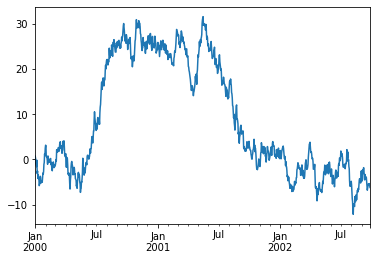

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

데이터프레임에서 [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리하다.

<Figure size 432x288 with 0 Axes>

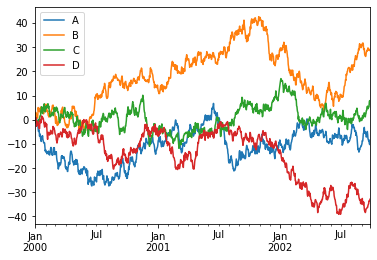

In [129]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 12) 데이터 입/출력 (Getting Data In/Out)

### 12-1) CSV

[csv 파일에 쓴다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)

In [130]:
df.to_csv('foo.csv')

[csv 파일을 읽는다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)

In [131]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.360804,1.476213,-1.265585,-0.240420
1,2000-01-02,0.152304,2.910805,-0.935624,0.640792
2,2000-01-03,0.149786,3.056196,-0.101461,0.915478
3,2000-01-04,0.448929,1.637972,-0.117874,-0.625844
4,2000-01-05,0.942632,1.786469,-0.512949,-2.706819
...,...,...,...,...,...
995,2002-09-22,-8.745917,28.871050,5.372952,-34.693096
996,2002-09-23,-8.355598,28.768257,5.388912,-33.545690
997,2002-09-24,-9.838548,28.876310,7.481758,-33.658828
998,2002-09-25,-10.267756,29.122170,7.903836,-33.454289


### 12-2) HDF5

[HDF5 Store에 쓰고 읽어온다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#hdf5-pytables)

In [132]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.360804,1.476213,-1.265585,-0.240420
2000-01-02,0.152304,2.910805,-0.935624,0.640792
2000-01-03,0.149786,3.056196,-0.101461,0.915478
2000-01-04,0.448929,1.637972,-0.117874,-0.625844
2000-01-05,0.942632,1.786469,-0.512949,-2.706819
...,...,...,...,...
2002-09-22,-8.745917,28.871050,5.372952,-34.693096
2002-09-23,-8.355598,28.768257,5.388912,-33.545690
2002-09-24,-9.838548,28.876310,7.481758,-33.658828
2002-09-25,-10.267756,29.122170,7.903836,-33.454289


### 12-3) Excel

[엑셀 파일(MS Excel)에 쓴다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#writing-excel-files) 

In [133]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

[엑셀 파일(MS Excel)을 읽어온다.](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#reading-excel-files) 

In [134]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.360804,1.476213,-1.265585,-0.240420
1,2000-01-02,0.152304,2.910805,-0.935624,0.640792
2,2000-01-03,0.149786,3.056196,-0.101461,0.915478
3,2000-01-04,0.448929,1.637972,-0.117874,-0.625844
4,2000-01-05,0.942632,1.786469,-0.512949,-2.706819
...,...,...,...,...,...
995,2002-09-22,-8.745917,28.871050,5.372952,-34.693096
996,2002-09-23,-8.355598,28.768257,5.388912,-33.545690
997,2002-09-24,-9.838548,28.876310,7.481758,-33.658828
998,2002-09-25,-10.267756,29.122170,7.903836,-33.454289


## 13) 잡았다! (Gotchas)

연산 수행 시 다음과 같은 예외 상황을 볼 수도 있다.

In [135]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 한다.

In [136]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
